# ЛИНЕЙНАЯ РЕГРЕССИЯ 

Набиуллина Розалия

# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

## Импорт библиотек

In [1]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Загрузка данных на Google Drive

In [2]:
uploaded = files.upload()

Saving cars_moldova_cat_num.csv to cars_moldova_cat_num.csv


## Считываем файл в DataFrame



метод .read_csv(path,delimiter) 

In [4]:
df = pd.read_csv('/content/cars_moldova_cat_num.csv', delimiter = ',')
df.head(6)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,12500.000000
4,23,124,2000,5,300000.0,2200.0,0,0,3490.0,13636.363636
5,42,88,2010,11,290000.0,1390.0,4,0,5600.0,24166.666667


In [5]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

# Линейная регрессия своими руками

Проведем линейную регрессию только по численным столбцам. Их у нас будет 4. <br>
Введем модель целевой переменной как
$$ \begin{align*}
   & y_i = X_i W^T + \epsilon_i , 
   \end{align*}
   $$
где 
<ul>
    <li> $y_i$ - целевой показаль предсказания для $i$ записи в наборе данных;</li>
    <li> $X_i $ - набор входных параметров для $i$ результата ;</li>
    <li> $W $ - набор весовых параметров, которые мы должны подобрать в моделе;</li>
    <li> $\epsilon_i$ - некоторый набор случайных (не объясняемых нашей моделью, остаточных) значений, мы будем считать их случайных шумом.  
</ul>   
    

In [7]:
df_num = df[num_columns].copy() # копируем только числовые столбцы

df_num.info() # информация о датафрейме

X, y = df_num.drop(columns = ['Price(euro)']).values, df_num['Price(euro)'].values

features_names = df_num.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # делим на тренировочную и тестовую выборку

scaler  = MinMaxScaler() # тасуем выборку
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train) 
X_test  = scaler.transform(X_test) 

pd.DataFrame(X_train).tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  32074 non-null  int64  
 1   Distance              32074 non-null  float64
 2   Engine_capacity(cm3)  32074 non-null  float64
 3   Price(euro)           32074 non-null  float64
 4   km_year               32074 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.2 MB


,0,1,2,3
22446,0.64,0.479896,0.353333,0.251134
22447,0.74,0.465893,0.479167,0.331520
22448,0.70,0.572360,0.333333,0.356492
22449,0.70,0.581916,0.375000,0.362475
22450,0.24,0.579916,0.000000,0.147012


In [8]:
def forward(weights, inputs): # транспонируем матрицу с весами 
    return inputs.dot(weights.T)

def loss_func(predicts, labels): #вводим функцию потерь регрессии как квадрат разности между целевыми значениями и их предсказаниями
        return np.square(predicts - labels)  

Протестируем обе функции

In [9]:
weights = np.random.randn(X.shape[1])
print(weights)
yhat = forward(weights, X_train[0])
loss = np.sqrt(loss_func(yhat, y[0]))
print(yhat, y[0], loss)

[ 0.24313717  1.42265959 -0.60357963 -0.22015101]
0.8523127698240611 7750.0 7749.1476872301755


Посмотрим на график того как меняется функция потерь в зависимости от отклонения (мультипликативного) оценки результата от его истинного значения.

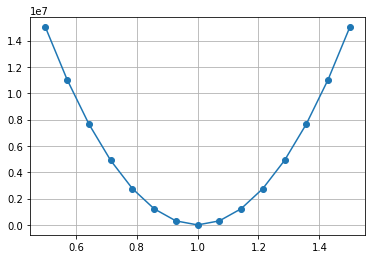

In [11]:
decline = np.linspace(start = 0.5, stop = 1.5, num = 15)
yhat = decline * y[0]
loss = loss_func(yhat, y[0])
plt.plot(decline, loss, '-o'); plt.grid(); 

In [12]:
def grad_loss(predicts, labels, inputs): #  производная функции потерь по набору оптимизируемых параметров
    return 2*(predicts - labels)*inputs/inputs.size

Проведем расчет градиента ошибки

In [13]:
weights = np.random.randn(X.shape[1])
yhat = forward(weights, X_train[0])
print(weights)
grad = grad_loss(yhat, y[0], X[0])
print(grad)

[ 0.58069895  2.07075919  0.72885858 -0.861959  ]
[-7.79081879e+06 -7.55449858e+08 -6.97338331e+06 -6.86772598e+07]


In [32]:
def update_weights(grad, weights, learning_rate): # обновляем веса в грудиентном спуске
    return weights - learning_rate * grad

In [33]:
learning_rate = 0.06
weights = update_weights(grad, weights, learning_rate)
print(weights)

[  470600.23538472 45328037.80221292   419918.79330233  4121849.6796643 ]


In [43]:
def weights_init(weights, random_state = 43): # выбираем начальные значения весовых параметров случайными значениями 
    if np.ndim(weights)<1:
        weights = np.zeros(weights)
        
    np.random.seed(random_state)
    return np.random.randn(*weights.shape)/np.sqrt(weights.size)

In [44]:
weights = weights_init(X_train.shape[1], random_state = 43)
weights

array([ 0.12869996, -0.45424072, -0.18925155, -0.2674578 ])

In [45]:
def fit(X, y, weights, lr, epochs = 31):  # обучение модели методом градиентного спуска
    
    cost = np.zeros(epochs)  
    for i in range(epochs): 
        
        grad = np.zeros(weights.shape);
        loss = 0;
        
        for m in range(X.shape[0]): 
            yhat  = forward(weights, X[m,:])
            grad += grad_loss(yhat,  y[m], X[m,:])
            loss += loss_func(yhat,  y[m])

        weights = update_weights(grad/X.shape[0],weights, lr)  
        cost[i] = loss/X.shape[0]
    
    return weights, cost # график функции потерь

Протестируем обучение

In [46]:
def plot_cost(cost):
    plt.plot(cost, 'o-', linewidth = 4, markersize = 15, mfc = 'none' ); 
    plt.grid()
    plt.xlabel("Эпоха", fontsize = 35)
    plt.ylabel("Функция Потерь", fontsize = 35)
    plt.xticks(FontSize = 25)

    plt.yticks(FontSize = 25);  

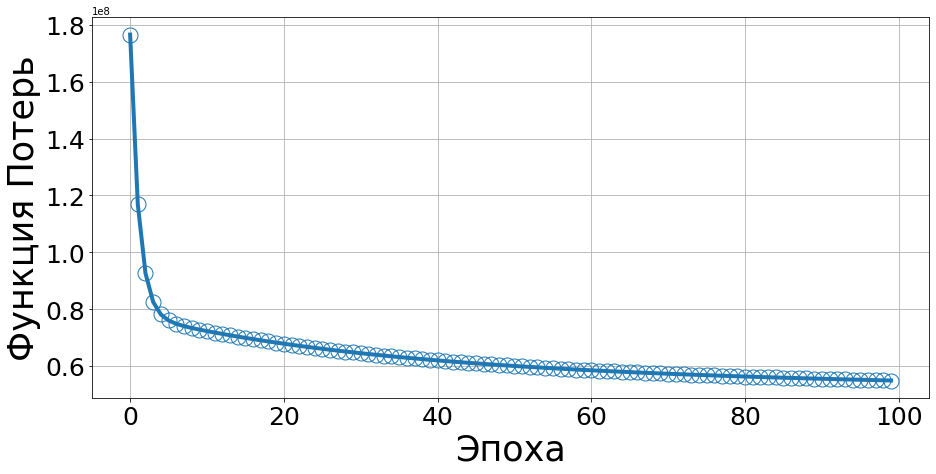

In [47]:
weights = weights_init(X_train.shape[1], random_state = 43)

weights, cost = fit(X_train, y_train, weights, lr=0.8,  epochs=100)

fig  = plt.figure(figsize = (15,7))
plot_cost(cost);

In [48]:
def predict(weights, inputs):
    yhat = np.zeros(inputs.shape[0])
    
    for m in range(inputs.shape[0]):
        yhat[m] = inputs[m,:].dot(weights.T)
    
    return yhat

Посмотрим, как выглядят предсказанные ответы на фоне реальных

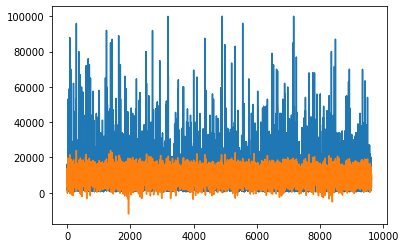

In [49]:
yhat = predict(weights, X_test)
plt.plot(y_test, label = 'original')
plt.plot(yhat, label = 'predicted');

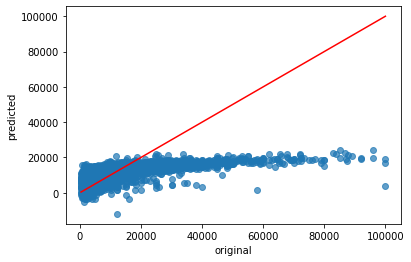

In [50]:
plt.scatter(y_test, yhat, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel('original')
plt.ylabel('predicted');

In [53]:
BATCH = 5000 # рассматриваем только часть данных, то есть мини-пакет(батч), в котором 5000 элементов данных

def fit_SGD(X, y, weights, lr,  epochs=31, batch_size = BATCH, random_state = 43):
    
    np.random.seed(random_state)
    
    cost = np.zeros(epochs)
    for i in range(epochs): 
        
        grad = np.zeros(weights.shape);
        loss = 0;
        
        idx_batch = np.random.randint(0,X.shape[0],batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        y_batch   = np.take(y, idx_batch)

        
        for m in range(batch_size): 
            yhat = forward(weights, x_batch[m,:])
            grad += grad_loss(yhat, y_batch[m], x_batch[m,:])
            loss += loss_func(yhat, y_batch[m])

        weights  = update_weights(grad/batch_size, weights, lr)  
        cost[i] = loss/batch_size
    
    return weights, cost

In [63]:
def vis_weigths(weights, names):
    numbers = np.arange(0,len(weights))
    tick_labels = names
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels, rotation = 45 );

# Оценим модель 

## Средняя квадратическая ошибка(MSE)

In [66]:
def mean_square_error(weights, inputs, labels):
    predicts = predict(weights, inputs)
    return np.mean(np.sum(np.square(labels-predicts)))

In [67]:
mean_square_error(weights, X_test, y_test)

584164191953.0544

## Средняя абсолютная ошибка(MAE)

In [68]:
def mean_absolute_error(weights, inputs, labels):
    predicts = predict(weights, inputs)
    return np.mean(np.sum(np.abs(labels-predicts)))

In [69]:
mean_absolute_error(weights, X_test, y_test)

45518060.20824146

Коэффициент детерминации

In [70]:
def r2_score(weights, inputs, labels): # Л2 регуляризация
    predicts = predict(weights, inputs)
    return 1-np.sum(np.square(labels - predicts)) /np.sum(np.square(labels - np.mean(labels)))

In [71]:
r2_score(weights, X_test, y_test)

0.3788977261348081

Объединяем всё в один класс

In [ ]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        
        # если веса и смещения заданы
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
                self.weights = np.append(self.bias,self.weights)
    
    #---------------------------------
    def forward(self, X):
        return self.weights.dot(X.T)
    
    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size
    
    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    #---------------------------------
    def update(self):    
        return self.weights - self.lr*self.grad
    
    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat
    
    #---------------------------------
    def score(self, X, y):        
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

     #---------------------------------
    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)
        
        if self.weights is None:
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: 
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
            self.weights = np.append(self.bias,self.weights)
        
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:            
            x_batch   = self.add_bias(X)
            y_batch   = y
        
        for i in range(self.epochs): 

            if self.batch_size: 
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
            self.weights = self.update()  
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]
     
    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()
    
    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

# Регуляризация линейной регрессии

### Регуляризация Тихонова

In [ ]:
class RidgeRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l2_penalty = 0.001,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         random_state = random_state)
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):   
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l2_term
                  
    
    #---------------------------------
    def update(self):    
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + l2_term) 


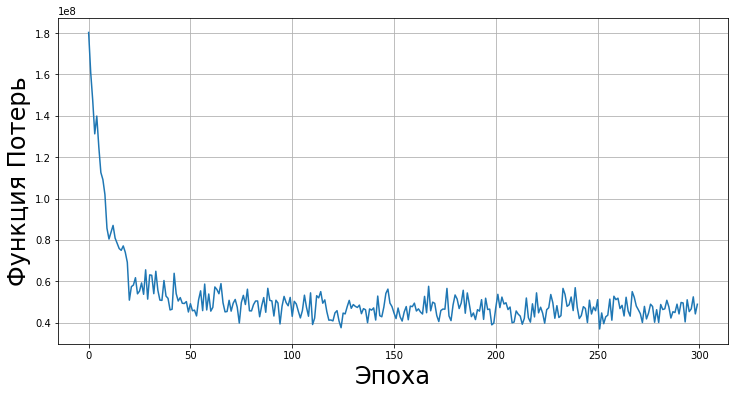

train R2: 0.4858; test R2: 0.4975


In [ ]:
regr = RidgeRegression(learning_rate=0.5,epochs=300,batch_size=3000, l2_penalty = 0.001)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

посмотрим веса

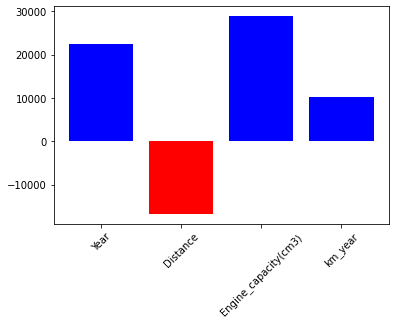

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

In [ ]:
np.sum(np.abs(w))

78317.62048064734